In [5]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('Live.csv')
columna1 = 'num_reactions'
columna2 ='num_comments'
data = data[data[columna1] != 0]
data = data[data[columna2] != 0]
columnas_seleccionadas = data[[columna1, columna2]]
print(columnas_seleccionadas)

      num_reactions  num_comments
0               529           512
2               227           236
5               217             6
6               503           614
7               295           453
...             ...           ...
7030             91             2
7032             10             1
7040             93            26
7043            196             2
7048            351            12

[4930 rows x 2 columns]


In [7]:
def manhattan_distance(point1, point2):
    return sum(abs(x - y) for x, y in zip(point1, point2))

def euclidean_distance(point1, point2):
    sum_squared_distance = sum((x - y) ** 2 for x, y in zip(point1, point2))
    return sum_squared_distance ** 0.5 

def initialize_centroids(data, k):
    centroids = random.sample(data, k)
    return centroids

def assign_to_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    
    for point in data:
        distances = [manhattan_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    
    return clusters

def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
        cluster_center = [sum(point[i] for point in cluster) / len(cluster) for i in range(len(cluster[0]))]
        centroids.append(cluster_center)
    return centroids

def has_converged(old_centroids, new_centroids, tol=1e-4):
    return all(manhattan_distance(old, new) < tol for old, new in zip(old_centroids, new_centroids))

def k_means(data, k):
    centroids = initialize_centroids(data, k)
    converged = False
    
    while not converged:
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        converged = has_converged(centroids, new_centroids)
        centroids = new_centroids
    
    return centroids, clusters


data_list = columnas_seleccionadas.values.tolist()
k=3
centroids, clusters = k_means(data_list, k)

for i, centroid in enumerate(centroids):
    print(f"Centroide {i + 1}: {centroid}")
    print(f"Puntos en el cluster {i + 1}: {clusters[i]}")


Centroide 1: [486.04615384615386, 5445.5615384615385]
Puntos en el cluster 1: [[446, 6148], [358, 5498], [452, 19013], [543, 4661], [564, 20990], [387, 3221], [468, 4143], [632, 3416], [636, 3014], [624, 12003], [616, 7130], [439, 5006], [545, 4741], [352, 4162], [480, 3175], [532, 7783], [498, 3882], [425, 4761], [483, 4031], [456, 3420], [583, 6151], [750, 5839], [984, 5166], [1238, 7895], [1140, 6523], [1156, 7208], [763, 4083], [910, 5963], [856, 5204], [1059, 6535], [835, 3919], [820, 4829], [1004, 7061], [846, 3692], [808, 5516], [892, 6622], [914, 7013], [1048, 3740], [703, 4007], [829, 6940], [1078, 9452], [840, 7145], [840, 4018], [1959, 6174], [233, 3360], [287, 3800], [431, 3450], [256, 2979], [319, 3053], [196, 2904], [379, 5491], [382, 3035], [1302, 4066], [261, 3456], [236, 2842], [292, 3779], [416, 5352], [370, 6316], [216, 4068], [408, 3994], [218, 3000], [236, 5237], [237, 3958], [364, 4845], [467, 2948], [371, 3789], [320, 3584], [576, 10186], [160, 4097], [247, 4255]

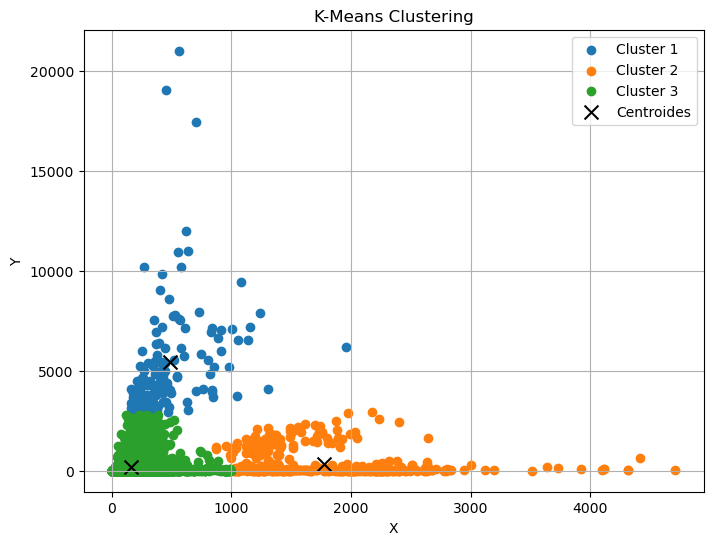

In [8]:
def plot_clusters(centroids, clusters):
    plt.figure(figsize=(8, 6))
    
    for i, cluster in enumerate(clusters):
        x, y = zip(*cluster)
        plt.scatter(x, y, label=f'Cluster {i + 1}')
    
    centroids_x, centroids_y = zip(*centroids)
    plt.scatter(centroids_x, centroids_y, color='black', marker='x', s=100, label='Centroides')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.grid(True)
    
    plt.show()

plot_clusters(centroids, clusters)

In [ ]:
def kMeansComplete(Archive, listaCaracteristicas, k): 
    data = pd.read_csv(Archive)
    for columna in listaCaracteristicas:

    data = data[data[columna1] != 0]
    data = data[data[columna2] != 0]
    columnas_seleccionadas = data[[columna1, columna2]]
    print(columnas_seleccionadas)